### Classificador para a flor Iris

O [conjunto de dados das flores Iris](https://www.airbnb.com.br/) é amplamente reconhecido na comunidade científica como uma ferramenta valiosa para análise de dados e aprendizado de máquina. Foi introduzido por Ronald Fisher em 1936 e coletado por Edgar Anderson como parte de seu estudo sobre a variação morfológica das flores Iris.

Este conjunto de dados é valorizado por sua simplicidade e clareza. Ele contém informações sobre três espécies de Iris: Iris Setosa, Iris virginica e Iris versicolor.

<center><img alt="Analisando Airbnb" width="50%" src="https://www.sakurai.dev.br/assets/images/posts/2018-10-17-classificacao-iris-01.png"></center>



**Sendo nuito utilizado devido à sua acessibilidade e fácil compreensão, o conjunto de dados das flores Iris é comumente utilizado classificação, como o estudo de caso que faremos neste notebook**




In [382]:
#Import dos pacotes necessários 

import pandas as pd 
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


## Obtenção dos dados 

Todos o dados utilizados neste notebook foram retirados da plataforma do [Kaggle](https://www.kaggle.com)

Para realizar a análise e classificação dos dados foi utilizado o seguinte dataset

- [IRIS.csv](https://www.kaggle.com/datasets/arshid/iris-flower-dataset) - Iris flower data set used for multi-class classification.


In [383]:
# Importar o arquivo IRIS.csv para um DataFrame

df = pd.read_csv('./dataset/IRIS.csv')

#### **Dicionário de variáveis**

Abaixo temos a descrição dos atributos contidos dentro desse conjunto de dados 

- `SepalLengthCM` - Comprimento da Sepala da flor
- `SepalWidthCM` - Largura da Sepala da flor
- `PetalLengthCM`-  Comprimento da petala da flor
- `PetalWidthCM`- Largura da petala da flor

Iremos analisar as cinco primeiras linhas desse dataset

In [384]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [385]:
df.shape

(150, 5)

## **Verificação de informações**

- Dado o exposto abaixo concluímos que não temos valores auxentes em nosso conjunto de dados. Conseguimos também verificar os tipos de cada atributo 

- Foi verificado a quantidade de amostras para cada espécie da Iris

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [387]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [388]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Visualização dos dados**

Nesta etapa utilizamos de recursos visuais para entender de que forma os dados estavam organizados, sendo possível identificar uma certa semelança em termos de largura e tamanho das sépalas nas espécies Íris Virginica e íris Versicolo

<Axes: title={'center': 'Largura da sepala x comprimento da sepala'}, xlabel='sepal_length', ylabel='sepal_width'>

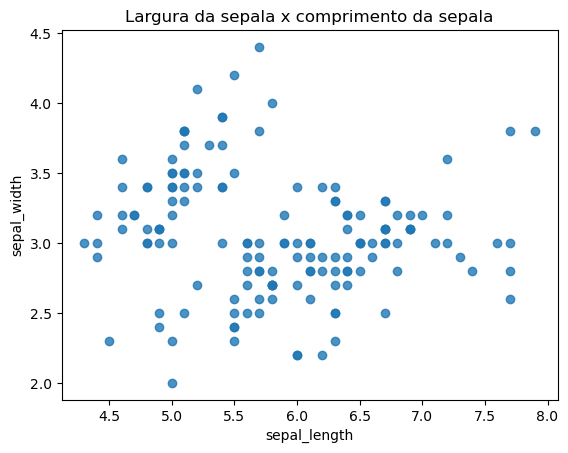

In [389]:
plt.title("Largura da sepala x comprimento da sepala")
sns.regplot(x="sepal_length", y="sepal_width", fit_reg=False, data=df)

<Axes: title={'center': 'Largura da petala x comprimento da petala'}, xlabel='petal_length', ylabel='petal_width'>

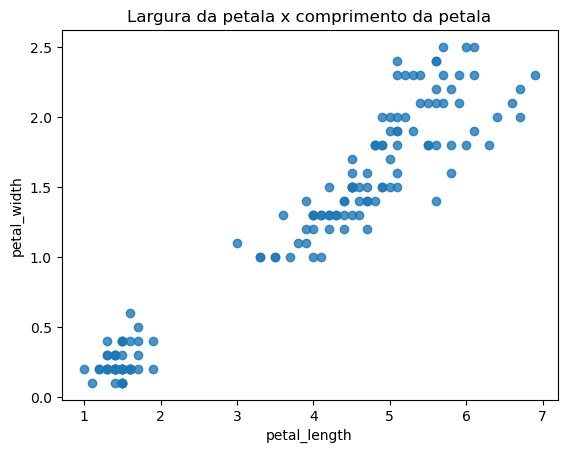

In [390]:
plt.title("Largura da petala x comprimento da petala")
sns.regplot(x="petal_length", y="petal_width", fit_reg=False, data=df)

c:\Users\Jp Lima\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


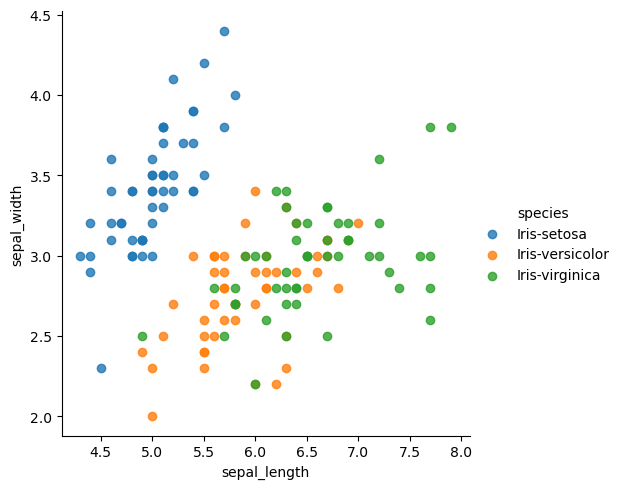

In [391]:
sns.lmplot(x="sepal_length", y="sepal_width", fit_reg=False, hue='species', data=df)

c:\Users\Jp Lima\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


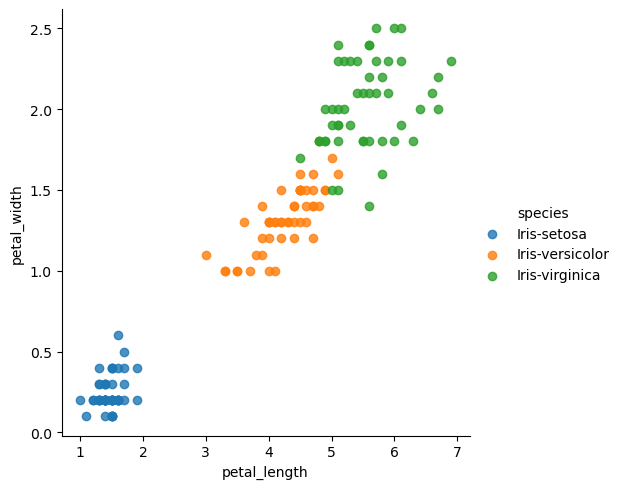

In [392]:
sns.lmplot(x="petal_length", y="petal_width", fit_reg=False, hue='species', data=df)

<Axes: xlabel='species', ylabel='sepal_length'>

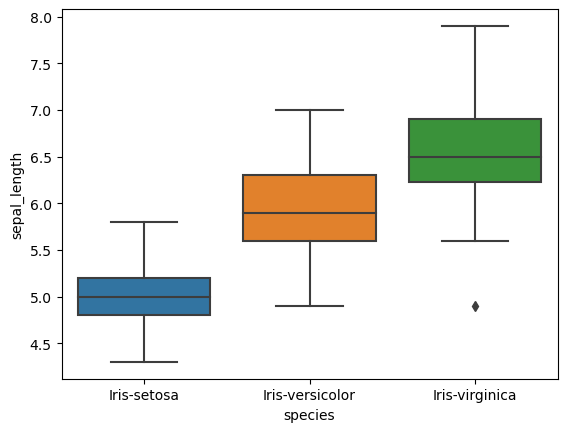

In [393]:
sns.boxplot(x='species', y ='sepal_length', data=df)

#### Shuffle no conjunto de dados

- Dado a forma que os dados estão dispostos em nosso dataset e o número limitado de dados, tomei a decisão de embaralhar os dados de forma a dificultar um pouco o overfitting desses dados 

In [394]:
df2 = shuffle(df)
df2 = df2.reset_index()
df2

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,37,4.9,3.1,1.5,0.1,Iris-setosa
1,135,7.7,3.0,6.1,2.3,Iris-virginica
2,64,5.6,2.9,3.6,1.3,Iris-versicolor
3,34,4.9,3.1,1.5,0.1,Iris-setosa
4,104,6.5,3.0,5.8,2.2,Iris-virginica
...,...,...,...,...,...,...
145,9,4.9,3.1,1.5,0.1,Iris-setosa
146,13,4.3,3.0,1.1,0.1,Iris-setosa
147,132,6.4,2.8,5.6,2.2,Iris-virginica
148,93,5.0,2.3,3.3,1.0,Iris-versicolor


#### Matriz de Correlação

<Axes: >

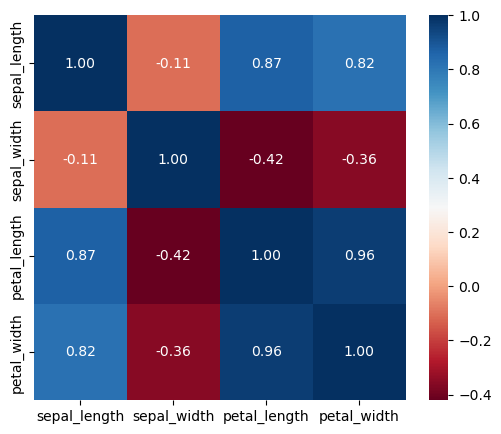

In [395]:
matrix_corr = df2[['sepal_length','sepal_width','petal_length','petal_width']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(fmt='.2f', cmap='RdBu', annot=True, data= matrix_corr)

Após a plotagem da matriz de correlação, podemos observar algumas correlações positivas significativas, descritas a seguir:

- Correlação forte de `0.87` entre as variáveis `PetalLengthCM` e `SepalLengthCM`.
- Correlação forte de `0.82` entre as variáveis `PetalWidthCM` e `SepalLengthCM`.
- Correlação forte de `0.96` entre as variáveis `PetalWidthCM` e `PetalLengthCM`.

Entretanto, é importante ressaltar que, apesar de haver correlação entre as variáveis, isso não implica necessariamente causalidade.

#### Inicio da preparação dos modelos

In [396]:
X = df2[['sepal_length','sepal_width','petal_length','petal_width']]
y = df2.species


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [397]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,6.4,3.2,4.5,1.5
15,5.0,3.5,1.3,0.3
65,6.5,3.2,5.1,2.0
11,6.4,3.1,5.5,1.8
42,5.6,2.8,4.9,2.0


In [398]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.4,2.7,5.3,1.9
18,5.6,3.0,4.5,1.5
118,6.9,3.1,5.1,2.3
78,5.1,3.4,1.5,0.2
76,4.6,3.2,1.4,0.2


## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) é um algoritmo de aprendizado supervisionado utilizado para problemas de classificação e regressão. É um método simples e intuitivo que classifica um ponto de dado com base na classe dos seus vizinhos mais próximos.

### Introdução ao KNN

O KNN é um algoritmo baseado em instância onde a classificação de um ponto de dados é determinada pela maioria dos seus $ k $ vizinhos mais próximos. A proximidade é geralmente medida usando distâncias como a distância Euclidiana.

### Distância Euclidiana

A distância Euclidiana entre dois pontos $ \mathbf{x}_i $ e $ \mathbf{x}_j $ no espaço n-dimensional é dada por:


$$ d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{\sum_{m=1}^{n} (x_{i,m} - x_{j,m})^2} $$


onde:
- $ \mathbf{x}_i $ e $ \mathbf{x}_j $ são vetores de características dos dois pontos.
- $ x_{i,m} $ e $ x_{j,m} $ são as m-ésimas características de $ \mathbf{x}_i $ e $ \mathbf{x}_j $, respectivamente.
- $ n $ é o número de características.

### Algoritmo KNN

1. **Escolha do valor de $ k $**: O valor de $ k $ é o número de vizinhos mais próximos a serem considerados.
2. **Calcular as distâncias**: Calcule a distância entre o ponto de dados a ser classificado e todos os pontos de dados no conjunto de treinamento.
3. **Identificar os $ k $ vizinhos mais próximos**: Selecione os $ k $ pontos de dados que possuem as menores distâncias ao ponto de dados a ser classificado.
4. **Classificação**: A classe do ponto de dado é determinada pela maioria das classes dos $ k $ vizinhos mais próximos.

In [399]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [400]:
y_pred = model_knn.predict(X_test)

In [401]:

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



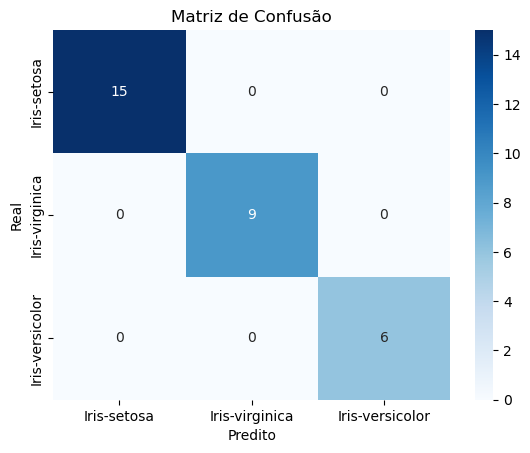

In [402]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df2['species'].unique(), yticklabels=df2['species'].unique())
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### Modelo de Árvore de Decisão em Classificação

As Árvores de Decisão são modelos de aprendizado supervisionado utilizados tanto para problemas de classificação quanto de regressão. Elas utilizam uma estrutura de árvore, onde os nós internos representam testes em atributos (features), os ramos representam os resultados dos testes, e os nós folhas representam as classes ou valores de saída.

#### Construção da Árvore

A construção de uma árvore de decisão envolve a divisão recursiva do conjunto de dados de treinamento em subconjuntos baseados nos valores dos atributos. O objetivo é criar subconjuntos o mais homogêneos possível em relação à variável de saída.

#### Critério de Divisão: Gini Impurity

A impureza de Gini é uma medida de quão frequentemente um item escolhido aleatoriamente seria incorretamente classificado se fosse rotulado aleatoriamente de acordo com a distribuição dos rótulos no conjunto de dados. 

$$ \text{Gini}(t) = 1 - \sum_{i=1}^C p_i^2 $$

onde:
- $ p_i $ é a proporção de elementos da classe $ i $ no nó $ t $.
- $ C $ é o número de classes.

#### Processo de Divisão

1. **Escolha do Atributo e Ponto de Divisão**: Selecione o atributo e o ponto de divisão que resulta na menor impureza de Gini.
2. **Divisão Recursiva**: Divida o conjunto de dados com base no atributo e ponto de divisão escolhidos. Aplique o processo recursivamente a cada subconjunto.
3. **Critérios de Parada**: A divisão para quando uma das seguintes condições é atendida:
   - Todos os pontos de dados no nó pertencem à mesma classe.
   - Não há mais atributos a dividir.
   - A profundidade máxima da árvore é atingida.
   - O número mínimo de amostras por nó é atingido.

#### Representação Matemática

O modelo de árvore de decisão pode ser representado matematicamente pela função $ f(\mathbf{x}) $ que mapeia um vetor de características $ \mathbf{x} $ para uma classe:

$$ f(\mathbf{x}) = \sum_{j=1}^M c_j I(\mathbf{x} \in R_j) $$

onde:
- $ M $ é o número de nós folhas.
- $ c_j $ é a classe atribuída ao nó folha $ j $.
- $ R_j $ é a região do espaço de características associada ao nó folha $ j $.
- $ I $ é a função indicadora que retorna 1 se $ \mathbf{x} \in R_j $ e 0 caso contrário.



In [403]:
model_decisiontree = tree.DecisionTreeClassifier()
model_decisiontree = model_decisiontree.fit(X_train,y_train)

In [404]:
y_pred_tree = model_decisiontree.predict(X_test)

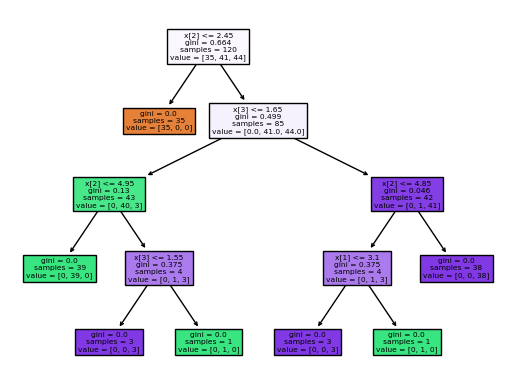

In [405]:
tree.plot_tree(model_decisiontree, filled=True);
plt.show()

In [406]:
print(classification_report(y_test, y_pred_tree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.83      0.83      0.83         6

       accuracy                           0.93        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.93      0.93      0.93        30



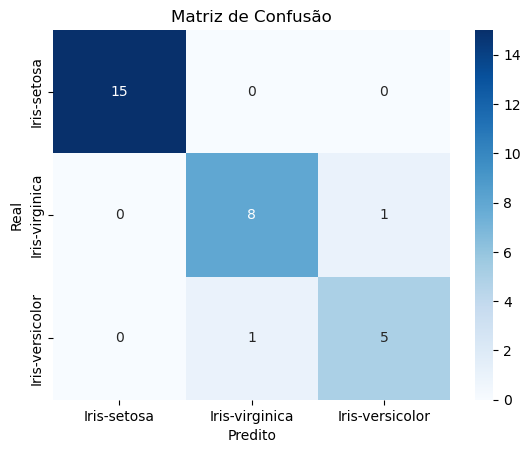

In [407]:
cm = confusion_matrix(y_test, y_pred_tree)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df2['species'].unique(), yticklabels=df2['species'].unique())
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## Suporte a Vetores de Máquinas (SVM) com Kernel RBF

O Suporte a Vetores de Máquinas (SVM) é uma poderosa técnica de aprendizado supervisionado utilizada para problemas de classificação e regressão. Uma das suas variantes mais eficazes para problemas de classificação não linear é o SVM com Kernel RBF (Radial Basis Function). Este artigo explica a teoria por trás do SVM com kernel RBF e como ele é aplicado.

### Introdução ao SVM

O SVM é um modelo de aprendizado supervisionado que busca encontrar o hiperplano de separação ótimo entre diferentes classes no espaço de características. O objetivo é maximizar a margem entre as classes, onde a margem é a distância entre o hiperplano de separação e os pontos de dados mais próximos de qualquer classe.

Para problemas linearmente separáveis, o SVM tenta encontrar o hiperplano que separa perfeitamente as classes. No entanto, muitos problemas no mundo real não são linearmente separáveis. Para tais problemas, o SVM pode ser estendido usando kernels, que mapeiam os dados para um espaço de maior dimensão onde um hiperplano linear pode ser utilizado para separação.

### Kernel RBF

O kernel RBF é um dos kernels mais populares utilizados com SVM. Ele é definido como:


$$ K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2\right) $$


onde:
- $ \mathbf{x}_i \ $ e $ \mathbf{x}_j $ são dois vetores de características.
- $ \gamma $ é um parâmetro que define a largura do kernel. Valores menores de $ \gamma $ resultam em um maior alcance de influência de um único ponto de dado, enquanto valores maiores de $ \gamma $ resultam em um menor alcance.

O kernel RBF mapeia os dados para um espaço de características de alta dimensão, permitindo que o SVM encontre um hiperplano de separação não linear no espaço original.

### Função Objetivo do SVM com Kernel RBF

A função objetivo do SVM com kernel RBF é encontrar os parâmetros $ \mathbf{w} $ e $ b $ que minimizem a seguinte expressão:


$$ min_{\mathbf{w}, b, \xi} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i $$


sujeito a:


$$ y_i (\mathbf{w} \cdot \phi(\mathbf{x}_i) + b) \geq 1 - \xi_i, \quad \xi_i \geq $$


onde:
- $ \mathbf{w} $ é o vetor de pesos no espaço de alta dimensão.
- $ b $ é o termo de bias.
- $ \xi_i $ são as variáveis de folga para lidar com a não separabilidade linear.
- $ C $ é o parâmetro de regularização que controla a troca entre maximizar a margem e minimizar o erro de classificação.
- $ \phi $ é a função de mapeamento implícita definida pelo kernel RBF.

In [408]:
model_svm_rbf = SVC(kernel='rbf')
model_svm_rbf= model_svm_rbf.fit(X_train,y_train)

In [409]:
y_pred_svm = model_svm_rbf.predict(X_test)

In [410]:
print(classification_report(y_test, y_pred_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.96      0.95        30
   weighted avg       0.97      0.97      0.97        30



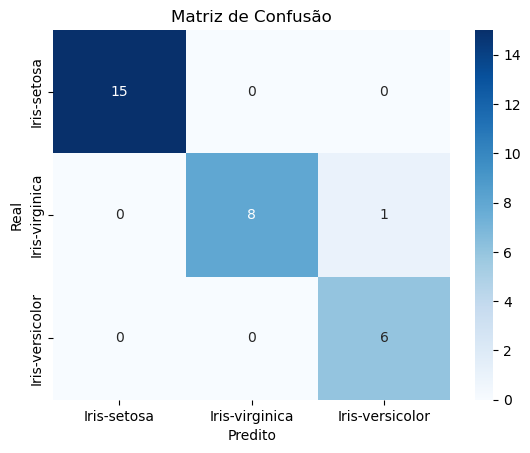

In [411]:
cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df2['species'].unique(), yticklabels=df2['species'].unique())
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### Conclusão

Com base na análise dos resultados, podemos concluir que o KNN demonstrou uma capacidade excepcional de generalização, alcançando uma acurácia perfeita e um desempenho consistente em todas as métricas de avaliação. Sua abordagem de classificação baseada na proximidade dos vizinhos mais próximos provou ser altamente eficaz para o conjunto de dados Íris.

A Árvore de Decisão, embora tenha obtido uma acurácia ligeiramente inferior em comparação com o KNN, ainda demonstrou um desempenho sólido. No entanto, observamos uma pequena queda na precisão e recall para algumas classes, o que sugere que a estrutura de decisão baseada em regras pode não ter capturado completamente a complexidade dos padrões presentes nos dados.

Por outro lado, o SVM com kernel RBF alcançou uma acurácia próxima da perfeição e um equilíbrio sólido entre precisão e recall para todas as classes. Sua capacidade de mapear os dados para um espaço de características de alta dimensão e encontrar uma fronteira de decisão não linear provou ser eficaz para separar as classes de forma otimizada.

Dado, o esposto concluímos que tanto o KNN quanto o SVM com kernel RBF são modelos altamente eficazes para a classificação do conjunto de dados Íris, com o KNN destacando-se pela sua simplicidade e eficiência computacional, enquanto o SVM com kernel RBF oferece uma abordagem mais flexível e poderosa para problemas de classificação não lineares. A Árvore de Decisão, embora seja uma opção viável, pode ser mais sensível à complexidade dos dados e requer ajustes cuidadosos para obter um desempenho comparável aos outros dois modelos.